Here is the GitHub repo where I've downloaded the data:
https://github.com/gastonstat/CreditScoring

---

The raw dataset is in the file **"CreditScoring.csv"** which contains 4455 rows and 14 columns:

<table>
<tbody>
<tr><td><b>Status</b></td> <td>credit status</td></tr>
<tr><td><b>Seniority</b></td> <td>job seniority (years)</td></tr>
<tr><td><b>Home</b></td> <td>type of home ownership</td></tr>
<tr><td><b>Time</b></td> <td>time of requested loan</td></tr>
<tr><td><b>Age</b></td> <td>client's age </td></tr>
<tr><td><b>Marital</b></td> <td>marital status </td></tr>
<tr><td><b>Records</b></td> <td>existance of records</td></tr>
<tr><td><b>Job</b></td> <td>type of job</td></tr>
<tr><td><b>Expenses</b></td> <td> amount of expenses</td></tr>
<tr><td><b>Income</b></td> <td> amount of income</td></tr>
<tr><td><b>Assets</b></td> <td> amount of assets</td></tr>
<tr><td><b>Debt</b></td> <td> amount of debt</td></tr>
<tr><td><b>Amount</b></td> <td> amount requested of loan</td></tr>
<tr><td><b>Price</b></td> <td> price of good</td></tr>
</tbody>
</table>


Defaulting on a loan in simple terms means not doing what you promised to do when you borrowed money. When you take out a loan, you agree to certain terms like making regular payments on time. If you fail to make those payments as agreed, it's called defaulting.

Imagine you borrowed money to buy a bicycle, and you promised to pay back a certain amount every month. If you miss a few payments or stop paying altogether, you are in default. It's like breaking a promise to the person or institution that lent you the money.

Defaulting on a loan can have consequences. It can hurt your credit score, which is like a report card of how trustworthy you are with money. It might also lead to extra fees, and in some cases, the lender could take legal action to get back the money you owe.

So, defaulting is essentially not keeping your end of the deal when it comes to repaying money you borrowed. It's important to communicate with your lender if you're having trouble making payments to explore possible solutions and avoid defaulting.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## MLFlow Part

In [4]:
import mlflow

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("credit-risk-scoring")

2023/12/12 22:35:30 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2023/12/12 22:35:30 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
2023/12/12 22:35:30 INFO mlflow.tracking.fluent: Experiment with name 'credit-risk-scoring' does not exist. Creating a new experiment.


<Experiment: artifact_location='/Users/goceovoono/Desktop/programming-stuff/mlz-latest/week-6/mlops-part/mlruns/1', creation_time=1702416930192, experiment_id='1', last_update_time=1702416930192, lifecycle_stage='active', name='credit-risk-scoring', tags={}>

In [5]:
df = pd.read_csv('./../data/CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
df.shape

(4455, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Status     4455 non-null   int64
 1   Seniority  4455 non-null   int64
 2   Home       4455 non-null   int64
 3   Time       4455 non-null   int64
 4   Age        4455 non-null   int64
 5   Marital    4455 non-null   int64
 6   Records    4455 non-null   int64
 7   Job        4455 non-null   int64
 8   Expenses   4455 non-null   int64
 9   Income     4455 non-null   int64
 10  Assets     4455 non-null   int64
 11  Debt       4455 non-null   int64
 12  Amount     4455 non-null   int64
 13  Price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


This is probably a mistake I would do and continue doing Data Cleaning. There are no missing values if you use `df.info()`. You can't even see how many unique values are in `Status` column (and we expect two!). 

Here is what we are going to do. 

In [8]:
df.describe().round()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,1.0,8.0,3.0,46.0,37.0,2.0,1.0,2.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,0.0,8.0,2.0,15.0,11.0,1.0,0.0,1.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,0.0,0.0,6.0,18.0,0.0,1.0,0.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,1.0,2.0,2.0,36.0,28.0,2.0,1.0,1.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,1.0,5.0,2.0,48.0,36.0,2.0,1.0,1.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,2.0,12.0,4.0,60.0,45.0,2.0,1.0,3.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,2.0,48.0,6.0,72.0,68.0,5.0,2.0,4.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


We see that `Income`, `Assets` and `Debt` have values 99999999.0 which in some cases indicate 'missing values'. I am not sure if for `Status`, based on `min` and `max`, we would know if there are only two values for that column `2` and `0` but it definetly throws some suspicion. To skip all the intricacies I will do `value_counts` even if I know that there are three different values. I hope I will memorize this useful trick in the future for some unknown dataset.

In [9]:
df['Status'].value_counts()

Status
1    3200
2    1254
0       1
Name: count, dtype: int64

Since there is only one value of '0' and whatever it means I will drop that row. It is just one row against the whole dataset.

In [10]:
df[df['Status'] == 0]

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
3309,0,10,3,60,25,1,1,1,35,148,3000,0,1500,1888


In [11]:
df = df[df['Status'] != 0].reset_index(drop = True)

In [12]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


Let's convert those  99999999.0 values to NaNs and check how many of them there are.

In [13]:
for c in ['Income', 'Assets', 'Debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Status     4454 non-null   int64  
 1   Seniority  4454 non-null   int64  
 2   Home       4454 non-null   int64  
 3   Time       4454 non-null   int64  
 4   Age        4454 non-null   int64  
 5   Marital    4454 non-null   int64  
 6   Records    4454 non-null   int64  
 7   Job        4454 non-null   int64  
 8   Expenses   4454 non-null   int64  
 9   Income     4420 non-null   float64
 10  Assets     4407 non-null   float64
 11  Debt       4436 non-null   float64
 12  Amount     4454 non-null   int64  
 13  Price      4454 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 487.3 KB


In [15]:
#How many rows have at least one NaN
df[df.isna().any(axis=1)].shape[0]

77

In [16]:
df[df.isna().any(axis=1)].head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
29,2,0,0,48,37,1,1,0,35,NaN,NaN,NaN,1500,1850
239,1,3,0,24,42,1,1,1,35,337.0,NaN,NaN,1300,1624
393,2,1,2,36,52,2,2,3,60,NaN,100000.0,20000.0,1500,2340
734,2,30,2,18,57,2,2,3,75,290.0,NaN,0.0,350,450
803,1,6,5,24,25,1,1,1,35,NaN,5000.0,0.0,850,1480


Let me first give columns some meaningful values before deciding what I should do.

In [17]:
#Convert column names to lowercase
df.columns = df.columns.str.lower()

In [18]:
status_values = {
    1: 'ok',
    2: 'default',
}

df.status = df.status.map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)


In [19]:
df_nans = df[df.isna().any(axis=1)]
df_nans.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
29,default,0,unk,48,37,single,no,unk,35,NaN,NaN,NaN,1500,1850
239,ok,3,unk,24,42,single,no,fixed,35,337.0,NaN,NaN,1300,1624
393,default,1,owner,36,52,married,yes,freelance,60,NaN,100000.0,20000.0,1500,2340
734,default,30,owner,18,57,married,yes,freelance,75,290.0,NaN,0.0,350,450
803,ok,6,parents,24,25,single,no,fixed,35,NaN,5000.0,0.0,850,1480


In [20]:
df_nans['status'].value_counts()

status
ok         40
default    37
Name: count, dtype: int64

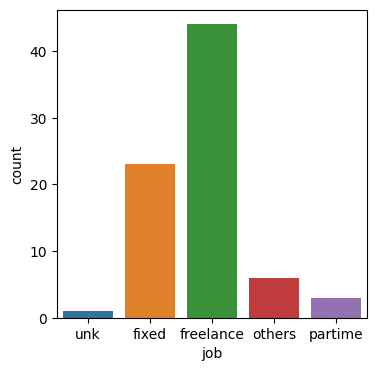

In [21]:
plt.figure(figsize=(4, 4))
sns.countplot(x="job", data=df_nans);

So, most of them are freelancers. Let's see in what phase are they. Maybe it is meaningful that they had no income, but had some assets and wanted a loan to start their bussines, and hence it might be meaningful to fill the income NaNs as `0`, or if they had say regular income but no assets, then maybe we can put assets to 0. 

**Income** is the money that an individual or business receives regularly for work, services, or investments.

**Assets** are valuable resources owned by an individual, company, or organization. These can be tangible or intangible items that have economic value.

Given that logic in mind I don't think any other variables would help us in understanding how to fix NaNs for the income and assets. Yes, having a home and putting it as an asset if he/she is an owner makes sense.

In [22]:
df_nans[df_nans['job'] == 'freelance'].head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
393,default,1,owner,36,52,married,yes,freelance,60,NaN,100000.0,20000.0,1500,2340
734,default,30,owner,18,57,married,yes,freelance,75,290.0,NaN,0.0,350,450
1128,ok,14,owner,60,56,married,yes,freelance,75,150.0,NaN,0.0,1000,1104
1306,ok,12,owner,36,41,married,no,freelance,60,NaN,10000.0,0.0,1000,2100
1420,default,0,owner,60,36,married,yes,freelance,75,NaN,6000.0,0.0,1650,1861


In [23]:
#Freelancers that have NaN as income
df_nans[(df_nans['job'] == 'freelance') & (df_nans['income'].isna())].head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
393,default,1,owner,36,52,married,yes,freelance,60,NaN,100000.0,20000.0,1500,2340
1306,ok,12,owner,36,41,married,no,freelance,60,NaN,10000.0,0.0,1000,2100
1420,default,0,owner,60,36,married,yes,freelance,75,NaN,6000.0,0.0,1650,1861
1436,ok,5,rent,24,29,married,no,freelance,45,NaN,0.0,0.0,800,1197
1455,default,2,owner,36,19,single,yes,freelance,35,NaN,9000.0,0.0,500,1100


We see that there are different type of loans but most of them are not that big so maybe they bought some equipment at most (no matter the assets!). They might already do the business (debt>0) and need loan for something.

We also see cases where there are no assets and, presumably, no income with small loans. We can treat those guys as 'starting a bussines'. 

Note: These are all guesses. 

---

Let's see the other spectrum and check some assumptions:

In [24]:
#Freelancer that doesn't have NaN as income
df_nans[(df_nans['job'] == 'freelance') & (df_nans['income'].notna())].head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
734,default,30,owner,18,57,married,yes,freelance,75,290.0,NaN,0.0,350,450
1128,ok,14,owner,60,56,married,yes,freelance,75,150.0,NaN,0.0,1000,1104
1892,default,27,owner,18,47,married,yes,freelance,75,0.0,NaN,NaN,5000,6500
2290,ok,20,owner,6,59,married,no,freelance,60,0.0,NaN,0.0,500,1402
2472,ok,5,owner,60,35,married,no,freelance,45,0.0,NaN,0.0,700,768


In [25]:
df_nans[(df_nans['job'] == 'freelance') & (df_nans['income'].notna())].tail(10)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3182,ok,3,owner,48,25,married,yes,freelance,35,0.0,NaN,0.0,500,1678
3217,default,14,owner,36,31,married,no,freelance,60,0.0,NaN,NaN,700,1100
3228,default,20,owner,24,59,single,no,freelance,35,0.0,NaN,0.0,900,1059
3660,default,5,owner,60,39,single,yes,freelance,75,72.0,NaN,0.0,1000,1042
3820,ok,10,owner,24,50,married,no,freelance,60,200.0,NaN,0.0,500,1131
4073,default,8,owner,60,64,married,no,freelance,60,111.0,NaN,NaN,1895,2596
4110,ok,0,owner,18,44,married,no,freelance,60,109.0,NaN,0.0,350,550
4167,default,5,owner,36,59,married,no,freelance,35,0.0,NaN,0.0,700,1100
4287,default,10,rent,36,35,single,no,freelance,40,50.0,NaN,NaN,500,1050
4445,ok,23,owner,60,50,married,yes,freelance,90,69.0,NaN,0.0,1450,1510


Pretty much a mixed group of variants. All of those could have a logical explanation of why the `assets` are NaN, but for a sake of simplicity we will populate the `assets` as zero and thus believe that bank for some reason gives loan to people with no income, no assets and no debt, and if such freelancers exist (and they do, they start from 'bottom'), then there is no problem to impute 0 for all other cases!

---

What about the others that are not freelancers?

In [26]:
df_nans[df_nans['job'] != 'freelance'].head(10)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
29,default,0,unk,48,37,single,no,unk,35,NaN,NaN,NaN,1500,1850
239,ok,3,unk,24,42,single,no,fixed,35,337.0,NaN,NaN,1300,1624
803,ok,6,parents,24,25,single,no,fixed,35,NaN,5000.0,0.0,850,1480
1059,ok,6,unk,12,25,single,no,fixed,35,69.0,NaN,NaN,500,1275
1669,ok,2,parents,48,20,single,no,fixed,35,318.0,NaN,0.0,740,1325
1801,ok,0,parents,24,21,single,no,others,35,NaN,300000.0,0.0,1318,1318
1806,default,0,rent,60,35,married,no,others,75,NaN,700.0,0.0,1800,2292
1811,ok,14,owner,24,50,married,no,fixed,60,92.0,NaN,NaN,1650,2261
1844,default,1,rent,24,31,separated,no,partime,41,58.0,NaN,NaN,200,300
1877,default,12,private,24,28,married,no,fixed,45,102.0,NaN,NaN,700,1229


Well, also it could be many, many of possible explanations and variations on the theme. I would say that either they are side hustling, or they are not and need loan for something else (even freelancer don't need to necessarily spend money on equipment e.g. laptop), maybe they have fixed (full time) job or part-time job and they are 'students', or maybe (based on `seniority==0`) they are 'just students' or 'finished school' etc.

There are small fragment of these people in the dataset and deleting those wouldn't harm the model, but what if in the practise after we put the model in the production we get another one which gets NaN for some fields? We need to have some strategy of imputation. 

---

**Final Conclusion:**

For all the cases I will impute all values as zero because on average it will make some sense and will 'explain' the datapoints sufficiently good. What I can conclude is that before diving into some esoteric imputation methods maybe some basic logic would suffice. Maybe doing a linear regression to impute them would also suffice. Just knowing that this part of the process could be a part of a data pipeline before datapoint even enters the model would mean that it could be improved with time, and we should start at very basic and improve the part of the pipeline later on. Nobody started with perfect model, perfect dataset etc. Some baseline has to be put out. 

Another point is that for example GBTs could handle missing values, which could be used as advantage.

In [27]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=np.nan, value=0)

In [28]:
#How many of them we have now?
df.isnull().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [29]:
df = df.reset_index(drop=True)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


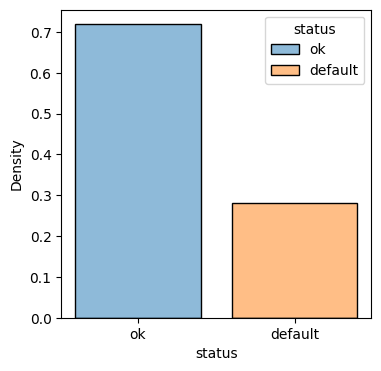

In [30]:
#Distribution of 'status' variable
plt.figure(figsize=(4, 4))
sns.histplot(x="status", hue = 'status', stat = 'density', shrink = 0.8, data=df);

In [31]:
#Split the numerical columns from the categorical ones

categorical = ['home', 'marital', 'records', 'job',]
numerical = ['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt', 'amount', 'price']

df[categorical].head()

,home,marital,records,job
0,rent,married,no,freelance
1,rent,widow,no,fixed
2,owner,married,yes,freelance
3,rent,single,no,fixed
4,rent,single,no,fixed


In [32]:
#First I am going to map status variable to 0 if the customer 'ok' (not defaulted) 
#or 1 if the customer 'defaulted' because we need to do aggregations on that

status_values = {
    'ok': 0,
    'default': 1
}

df.status = df.status.map(status_values)

In [33]:
#For categorical variables we will use concept of mutual information to asses important features

from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df.status)

df_mi = df[categorical].apply(calculate_mi) #For each column apply calculate_mi function
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')#Sort it by descending order


df_mi.head()

,MI
records,0.035426
job,0.034318
home,0.025065
marital,0.005863


In [34]:
df['job'].unique()

array(['freelance', 'fixed', 'partime', 'unk', 'others'], dtype=object)

We see that marital status doesn't play that significant role in deciding if someone will 'default' or not. Among too many cases I can't think of an idea where marital status in some sense has correlation with person 'defaulting'. There are those special occasions like in movies where you go bankrupt after getting married, but on average, probability of such event is insignificant. The first thing you do after loosing a job is finding a new one to return the loan. 

`home` might also be important but it somehow correlates with 'assets' and sometimes it is the case we want to delete highly correlated features. It can be significant, but maybe not. Person who lives with parents and is a freelancer can live there for actually saving money such that it can pay debt. 

Then again:
In credit scoring, a home is generally considered an asset, but it is typically assessed as part of an individual's overall financial picture rather than directly factored into traditional credit scores like FICO or VantageScore. 

Looks like it is more of a subjective feature. I will keep it in mind, but would definetly try model without it. 

Having a `job` can guarantee you in some context whether the person will default or not. People working full-time have steady 'fixed' income and are more likely to return loans than people who work partime. Freelancers today on average make more money, but again it might be variable. They can work for fixed salary, look for gigs, work part-time to have more money besides the fixed salary etc. There is some variability there. For the 'unk' and 'others'. 

In the context of credit scoring, the "existence of `records`" generally refers to the presence or absence of credit history or financial records associated with an individual. This is possibly one of those 'most important features' which scope I can't fully grasp. ChatGPT to the rescue!

**Existence of Records (Credit History):**

Imagine you take out a loan or get a credit card. Every time you make a payment, it gets recorded in your credit history.
These records show whether you pay your bills on time, how much debt you have, and how you manage credit.
Having a positive credit history, with on-time payments and responsible credit use, is generally good for your credit score.

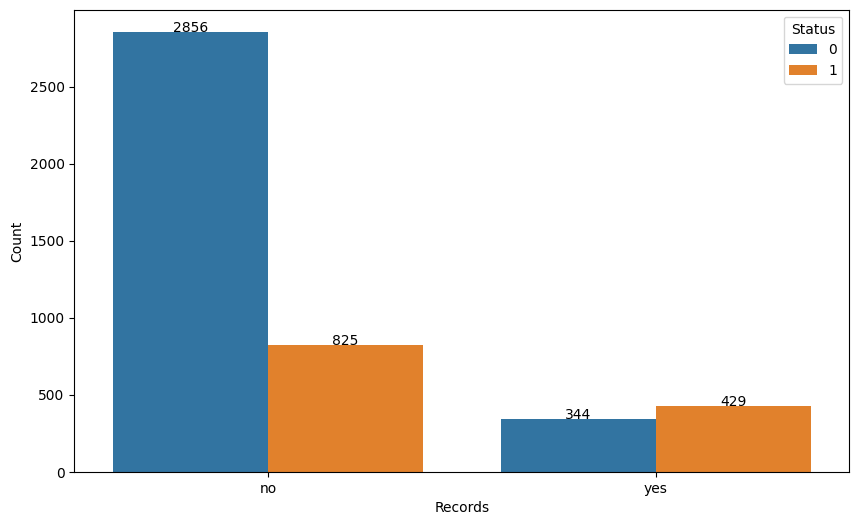

In [35]:
#Records VS Status
plt.figure(figsize=(10, 6))

# Create the countplot
ax = sns.countplot(x="records", hue="status", data=df)

# Annotate each bar with the count
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2,
            f'{int(height)}', ha="center")

plt.xlabel('Records')
plt.ylabel('Count')
plt.legend(title='Status', labels=['0', '1'])  # Add legend for clarity
plt.show()


Having a credit history is generally considered positive in the context of credit scoring. It provides a track record of how the individual has managed credit in the past.

While having a credit history is generally considered positive, the content and quality of that credit history matter. A person may have a credit history that includes missed payments, high levels of debt, or other negative factors, making them more likely to default.

Not having a credit history might be neutral or have a slight negative impact on credit scoring. Lenders often use credit history to assess creditworthiness, and the absence of a credit history makes it more challenging for them to evaluate the individual's risk.

It's important to consider the nature of the information within the credit history, not just the presence or absence of a credit history itself. Factors such as late payments, high credit utilization, or a history of defaults can contribute to a higher likelihood of default, even among individuals with a credit history.

From this plot we see that in this particular bank (and this particular dataset) there might be a lot of people with poor credit history since risk of defaulting is larger for people that have credit history than those who don't. Further investigating of those potential group and using features to asses it MIGHT suggest a correlation between having a credit history and a higher likelihood of default, it could be indicative of certain patterns or risk factors within that group. Since correlation is not causation correlation further analysis and consideration of additional variables may be necessary to understand the underlying reasons for the observed patterns.

---
Since there is a huge discrepancy in default risk ratio, indeed this seems like one of the most promising categorical features.

In [36]:
categorical

['home', 'marital', 'records', 'job']

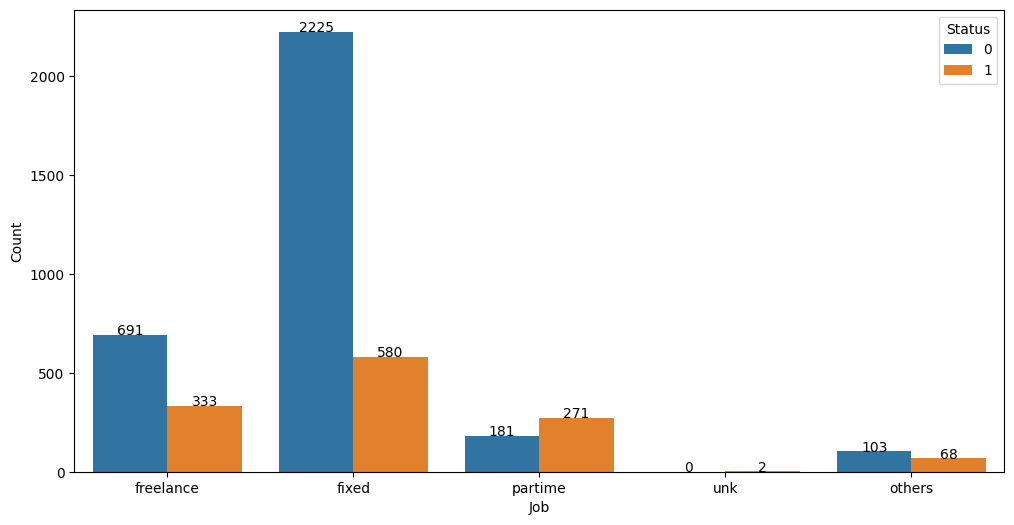

In [37]:
#Job VS Status
plt.figure(figsize=(12, 6))

# Create the countplot
ax = sns.countplot(x="job", hue="status", data=df)

# Annotate each bar with the count
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2,
            f'{int(height)}', ha="center")

plt.xlabel('Job')
plt.ylabel('Count')
plt.legend(title='Status', labels=['0', '1'])  # Add legend for clarity
plt.show()


As I've guessed, having a fixed (full-time) job will make a less risky group of people who will potentialy default, and part time job is more likely because in this dataset there exist group of people who do only part-time job. Freelancers are variable group as I've explained and their chances are roughly 50% of defaulting. 

For 'others' I didn't find what that could be so it might be 'mixture of fixed+partime job', or maybe some 'special kind of customers that take loan'. Let me check some of those guys and see if we can understand them a little better.

In [38]:
df[df['job']=='others'].head(10)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
42,0,0,owner,60,61,widow,no,others,35,230.0,50000.0,0.0,950,1150
77,0,0,other,36,46,married,yes,others,45,45.0,0.0,0.0,900,1100
97,0,3,owner,60,54,widow,no,others,35,80.0,4000.0,0.0,950,1382
224,0,4,owner,60,64,single,no,others,35,150.0,9000.0,0.0,984,1054
259,1,0,rent,12,37,married,no,others,88,130.0,0.0,0.0,250,375
297,0,3,owner,18,66,married,no,others,45,69.0,12000.0,0.0,500,1101
299,0,0,owner,42,65,married,no,others,45,77.0,4000.0,2000.0,750,1194
309,0,1,private,12,46,married,no,others,90,90.0,2000.0,600.0,500,1193
347,1,0,owner,12,61,married,no,others,60,40.0,4000.0,0.0,170,1394
379,1,0,owner,24,20,single,no,others,60,152.0,2000.0,0.0,400,480


In [39]:
df[df['job']=='others']['assets'].max()

300000.0

In [40]:
df['assets'].max()

300000.0

In [41]:
df[df['assets']==300000.0]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
1801,0,0,parents,24,21,single,no,others,35,0.0,300000.0,0.0,1318,1318


Either a 'shark' or very shady bussines, or someone purposely made this datapoint. 
Lives at parents home, single, young, no credit history, has zero income and 300000 in assets. 
Oh, and didn't work (seniority == 0). I will delete this fella. 

In [42]:
df = df[~(df['assets']==300000.0)].reset_index(drop=True)

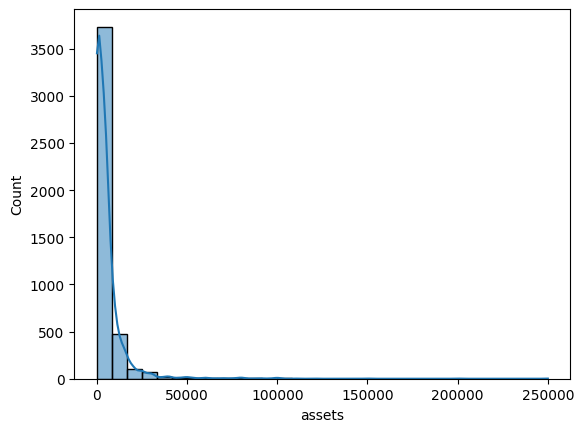

In [43]:
#Assets
sns.histplot(df['assets'], bins=30, kde=True);

In [44]:
#The tail looks fat...
(df[df['assets']>=100000]['job']).value_counts()

job
freelance    8
others       1
partime      1
Name: count, dtype: int64

In [45]:
df[df['assets']>=100000]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
125,0,12,owner,48,35,separated,no,freelance,45,500.0,200000.0,0.0,2380,4786
142,0,15,owner,24,54,married,no,freelance,90,350.0,150000.0,0.0,3800,8800
218,0,20,owner,24,53,married,no,freelance,45,200.0,100000.0,0.0,1000,1419
393,1,1,owner,36,52,married,yes,freelance,60,0.0,100000.0,20000.0,1500,2340
398,0,25,owner,12,43,married,no,freelance,75,250.0,100000.0,0.0,600,841
872,1,0,other,60,47,married,yes,others,45,250.0,100000.0,0.0,1300,1700
1970,0,0,parents,36,24,single,no,freelance,45,0.0,250000.0,0.0,700,1214
2655,0,5,rent,48,36,married,yes,freelance,72,120.0,100000.0,0.0,775,950
3302,0,20,owner,18,47,married,yes,freelance,60,0.0,110000.0,0.0,1800,3300
4127,0,1,parents,60,22,married,no,partime,35,195.0,120000.0,0.0,1550,1550


We could take wild guesses of why some of them 'defaulted' and others don't but in terms of having huge assets I think everything is fine. They even have better 'explanation' than the rich kid from the above in my opinion.

Let's check now assets for case when `job==other`:

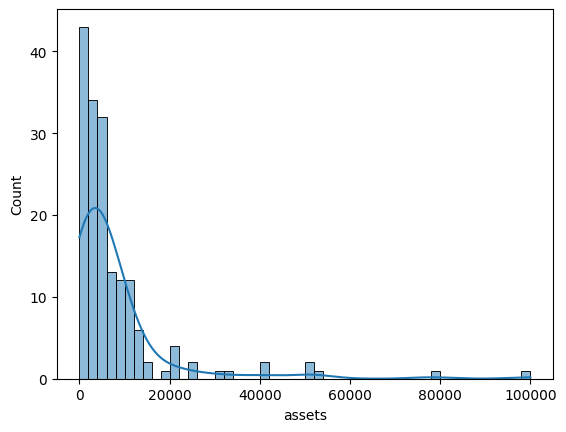

In [46]:
sns.histplot(df[df['job']=='others']['assets'], bins=50, kde=True);

A skewed distribution like this doesn't promise that they are some kind of special group having huge amount of money. Let's check the distribution of age. That seems like people who tend to be older.

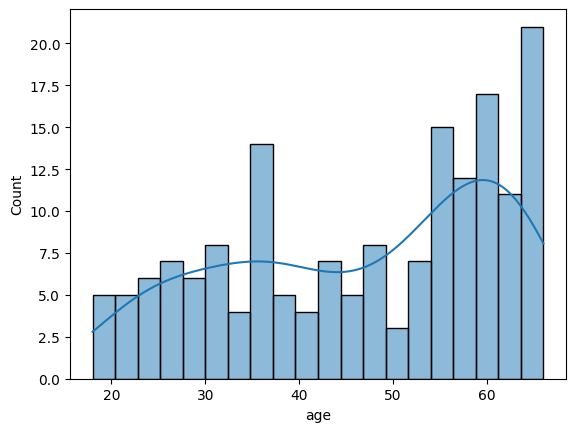

In [47]:
sns.histplot(df[df['job']=='others']['age'], bins=20, kde=True);

In [48]:
df[df['job']=='others']['age'].describe()

count    170.000000
mean      46.935294
std       14.470596
min       18.000000
25%       35.000000
50%       50.500000
75%       60.000000
max       66.000000
Name: age, dtype: float64

The majority of people in this group are middle-aged spanning from 35-60 (75%-25% = 50% of them), but still there is diversity in age to give some conclusions. Mean is around 47 so it might indicate group where majority of people are 'retired' or early retired, where the 'young' ones are there because of some other reason. Possibly YouTubers or that kind of jazz.

In [49]:
#Mean age of our dataset
df['age'].mean()

37.08398832247923

In [50]:
#Confirm that there are no inapropriate ages in this dataset
df.age.min()

18

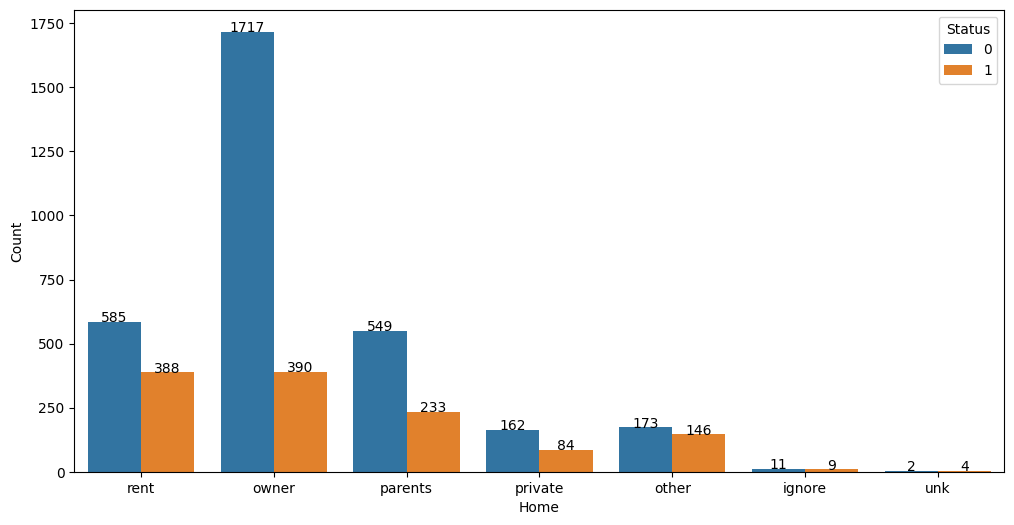

In [51]:
#Home VS Status
plt.figure(figsize=(12, 6))

# Create the countplot
ax = sns.countplot(x="home", hue="status", data=df)

# Annotate each bar with the count
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2,
            f'{int(height)}', ha="center")

plt.xlabel('Home')
plt.ylabel('Count')
plt.legend(title='Status', labels=['0', '1'])  # Add legend for clarity
plt.show()




I was a bit right about all the home intuition and the idea that it is mostly 'subjective' feature and assesment if someone should get a loan or if someone would 'default' or not. Yes, there is 'bigger' risk if someone rents than he/she is an owner. "Others" might refer to people who are 'homeless' in a sense they live in a van or something. They are indeed a bit risky, but again nothing here jumps too much. Might correlate with assets but again it doesn't have to. It will be up to me later to try with or without this feature.

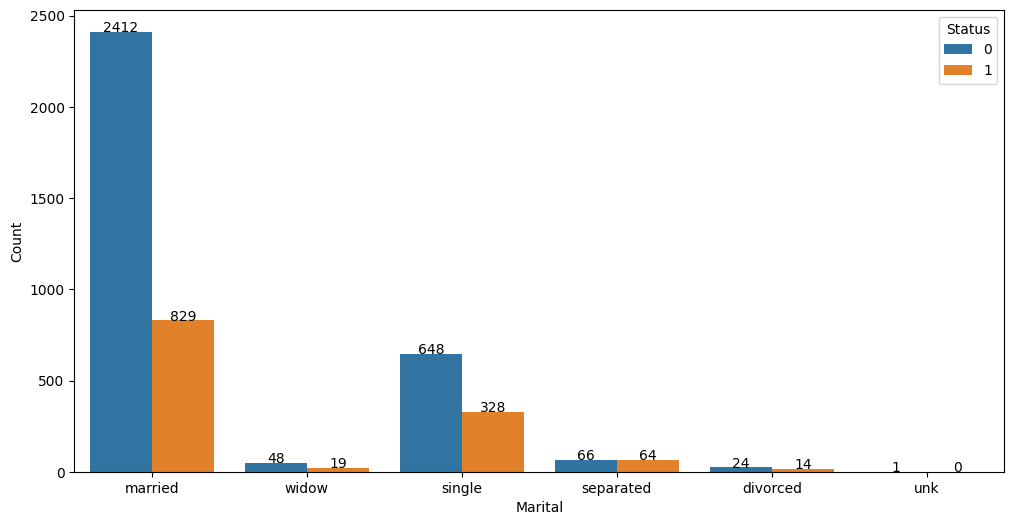

In [52]:
#Marital VS Status <- This one is punny!
plt.figure(figsize=(12, 6))

# Create the countplot
ax = sns.countplot(x="marital", hue="status", data=df)

# Annotate each bar with the count
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2,
            f'{int(height)}', ha="center")

plt.xlabel('Marital')
plt.ylabel('Count')
plt.legend(title='Status', labels=['0', '1'])  # Add legend for clarity
plt.show()




Again, nothing that jumps out and seems like pretty much there is equal possibility of defaulting for each subgroup. I would count that having more datapoints for people that are separated would prove the same.

---

What Mutual Information tells you in a nutshell "if we know about `records`, `home` and `job` we already know about each customer if it is going to default or not".

## Numerical Features

Let's calculate linear correlation between the variables:

In [53]:
df[numerical].corrwith(df.status).to_frame('correlation').sort_values(by = 'correlation', ascending = True)

,correlation
seniority,-0.260570
income,-0.214352
assets,-0.102055
age,-0.095534
debt,0.009973
price,0.010708
expenses,0.028712
time,0.100443
amount,0.154645


I've orderded them in Ascending fashion just so I can spot 'top' correlation coefficients for both negatively and positevely correlated features with `status`. If it is easier for you do an absolute value, but don't lose sense if they are positively or negatively correlated. 

`seniority` being negatively correlated means that the more we have years of work behind us the less likely we are to default. Seems kind of intuitive because the more you work the more responsible person you become, the more money you have under a belt, the more financially proficient you become and understand the real value of taking a loan for something. On average that should be the case. As you see it is not 'that detremential' because there is sort of 'mild' correlation which means that increasing seniority will 'sometimes' lead to decrease in defaulting. 

I would say the same story applies to `income` and that is because `seniority` in some vague sense correlate with that. The more money you have per month the less likely you will 'feel' some amount of loan, especially if you are bussinesman. Of course, it depends on the `amount` of loan. Person who has income of 4000 dollars and wants a loan for new MacBook doesn't feel it the same as person who has low income (e.g. 700 dollars). That is why `amount` is top feature having positive correlation. Might be a good idea to make feature scaling there! 

`time` of requested loan could have some correlation because, yes, the more time you have the more 'chopped' are the parts of the loan you have to get back. 

Out of all these numerical features I will use those that have `abs(correlation)>=0.1`. 

In [54]:
categorical = ['records', 'job', 'home']
numerical = ['seniority', 'income', 'assets', 'time', 'amount']

Instead of correlation you could make the same assumptions via box-plots or violin plots. Here are the examples:

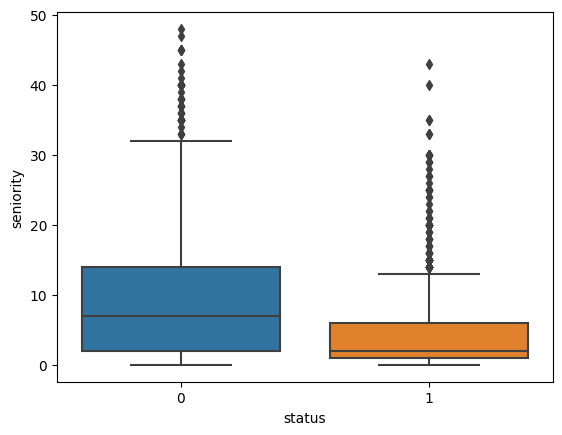

In [55]:
#Check 1: The more ages you put into work the less likely you are going to default
sns.boxplot(x='status', y='seniority', data=df);

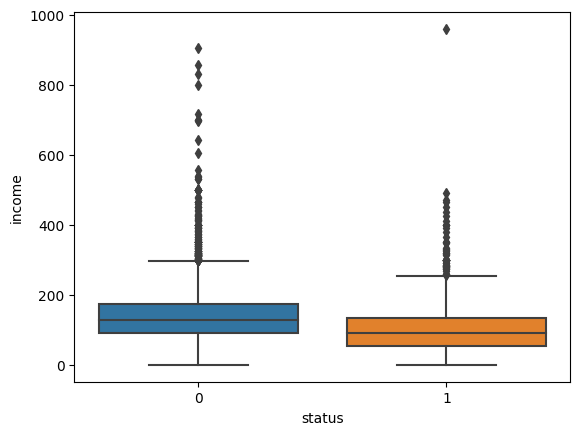

In [56]:
#Check 2: The more income you have the less likely you will default
sns.boxplot(x='status', y='income', data=df);

In [57]:
df = df[categorical + numerical + ['status']].reset_index(drop = True)
df.head()

,records,job,home,seniority,income,assets,time,amount,status
0,no,freelance,rent,9,129.0,0.0,60,800,0
1,no,fixed,rent,17,131.0,0.0,60,1000,0
2,yes,freelance,owner,10,200.0,3000.0,36,2000,1
3,no,fixed,rent,0,182.0,2500.0,60,900,0
4,no,fixed,rent,0,107.0,0.0,36,310,0


The only feature engineering thing I see here is possibly `amount/time` and should represent "monthly installment"/"monthly payment". Let's create that feature.

In [58]:
df['monthly_payment'] = (df['amount']/df['time']).round(2)

In [59]:
df.head()

,records,job,home,seniority,income,assets,time,amount,status,monthly_payment
0,no,freelance,rent,9,129.0,0.0,60,800,0,13.33
1,no,fixed,rent,17,131.0,0.0,60,1000,0,16.67
2,yes,freelance,owner,10,200.0,3000.0,36,2000,1,55.56
3,no,fixed,rent,0,182.0,2500.0,60,900,0,15.00
4,no,fixed,rent,0,107.0,0.0,36,310,0,8.61


In [60]:
#I don't know why but I always put target variable as the latest column
df = df[categorical+numerical+['monthly_payment', 'status']].reset_index(drop = True)
df.head()

,records,job,home,seniority,income,assets,time,amount,monthly_payment,status
0,no,freelance,rent,9,129.0,0.0,60,800,13.33,0
1,no,fixed,rent,17,131.0,0.0,60,1000,16.67,0
2,yes,freelance,owner,10,200.0,3000.0,36,2000,55.56,1
3,no,fixed,rent,0,182.0,2500.0,60,900,15.00,0
4,no,fixed,rent,0,107.0,0.0,36,310,8.61,0


## Validation Framework

Because `StandardScaler` uses mean and std as a way to scale each datapoint I think it might be good to use 'global' mean and 'global' std, because after you split the data then e.g. df_train might have different mean than df_valid. And `StandardScaler` is way to go rather than `MinMaxScaler`. 

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()

In [62]:
columns_to_scale = ['seniority', 'income', 'assets', 'time', 'amount', 'monthly_payment']
columns_to_leave_unchanged = ['job', 'home', 'records', 'status']

In [63]:
#Quick check if we covered all the columns
sorted(columns_to_leave_unchanged + columns_to_scale) == sorted(list(df.columns))

True

In [64]:
#Create a ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale),
        ('passthrough', 'passthrough', columns_to_leave_unchanged)
    ],
    remainder='drop'  # Drop columns not specified
)

# Apply the transformation to your DataFrame
df_scaled = column_transformer.fit_transform(df)

# Convert the result back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=columns_to_scale + columns_to_leave_unchanged).reset_index(drop = True)

# Display the scaled DataFrame
df_scaled.head()

,seniority,income,assets,time,amount,monthly_payment,job,home,records,status
0,0.123749,-0.006876,-0.495992,0.92524,-0.503355,-0.637828,freelance,rent,no,0
1,1.10253,0.016173,-0.495992,0.92524,-0.081883,-0.443206,fixed,rent,no,0
2,0.246097,0.81136,-0.21422,-0.712806,2.025476,1.822911,freelance,owner,yes,1
3,-0.97738,0.60392,-0.261182,0.92524,-0.292619,-0.540517,fixed,rent,no,0
4,-0.97738,-0.260414,-0.495992,-0.712806,-1.535961,-0.912862,fixed,rent,no,0


In [65]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

df_full_train, df_test = train_test_split(df_scaled, test_size=0.2, random_state=RANDOM_STATE)

df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=RANDOM_STATE)

#After shuffling we need some order. :P 
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [66]:
#Detach the 'status' column from each one of them

y_full_train = df_full_train.status.values.astype(int)
y_train = df_train.status.values.astype(int)

y_val = df_val.status.values.astype(int)
y_test = df_test.status.values.astype(int)


del df_full_train['status']
del df_train['status']
del df_val['status']
del df_test['status']

# Modeling without parameter tuning

This will serve me as a check if I've done everything correctly whilst preparing the data. After this I will tune models by looking at the `MLFlow` and how it works. From there I plan to extract the best model, create a simple FastAPI web-app and deploy it to Google and Azure.

In [67]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

#Stratified k-fold CV for me is a way to go for assesing performance on the model 
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = RANDOM_STATE)

#One-Hot-Encoding variables
dv = DictVectorizer(sparse=False)

In [68]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)
X_valid = dv.transform(val_dicts)

## Logistic Regression

In [69]:
#Logistic Regression with default C==1
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)

logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [70]:
#Now let's asses the AUC score on the y_val 

y_pred = logreg.predict_proba(X_valid)[:, 1]
roc_auc_score(y_val, y_pred)

0.83327964117115

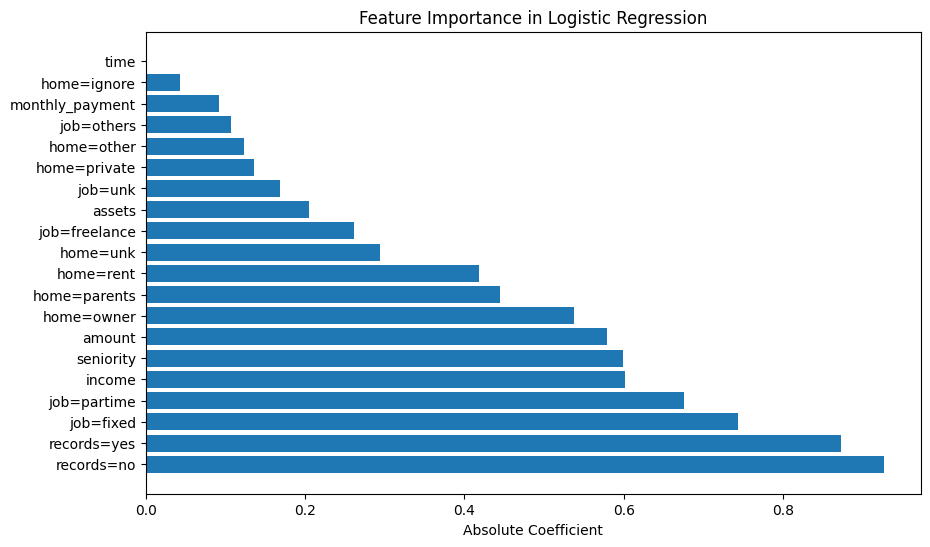

In [71]:
# Get the feature names from DictVectorizer
feature_names = dv.get_feature_names_out()

# Get the feature coefficients
coefficients = logreg.coef_[0]

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': abs(coefficients)
})

# Sort the DataFrame by absolute coefficient values
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Feature Importance in Logistic Regression')
plt.show()

Seems like `home` has prominent role according to LogisticRegression, and also what I've found interesting that `time` has negligible effect. It's weight is close to 0. On the other hand, `monthly_payment` seems like a promising feature we've engineered. We will check what other models think of that. 

AUC = 0.83 isn't that bad either. Last time when we used all features this was XGBoost's score.

## Decision Tree

Since plain Decision Tree overfits on the training data I will use best params found in `credit-risk-scoring.ipynb`. I know, this dataset uses different features but I just want to test it. 

In [72]:
from sklearn.tree import DecisionTreeClassifier

dt_best_params= {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 50}

dt = DecisionTreeClassifier(**dt_best_params)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_valid)[:, 1]


roc_auc_score(y_val, y_pred)

0.8045429764456615

Not bad for a single Decision Tree! We will see when we optimize those parameters better how will it behave. For now, let's see the feature importance. 

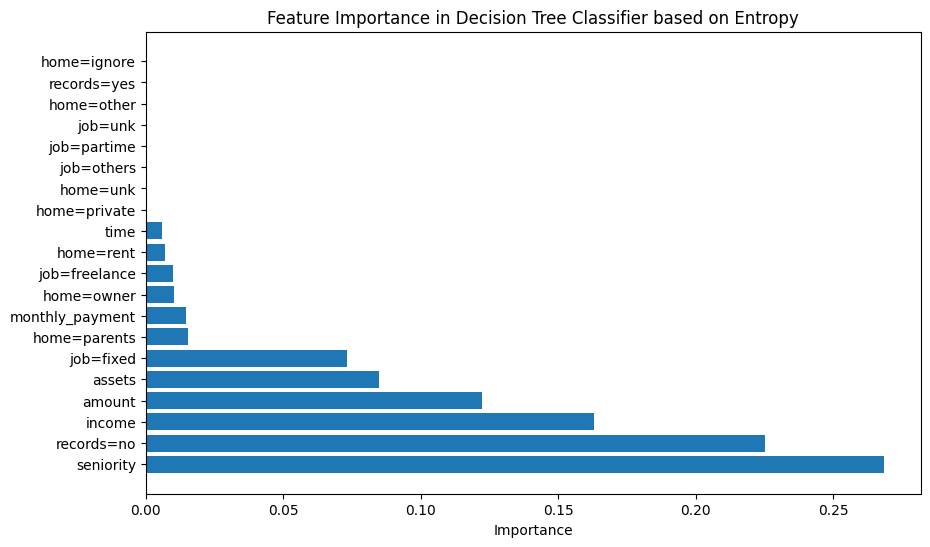

In [73]:
####### Get feature importances
feature_importances = dt.feature_importances_

# Get the corresponding feature names
feature_names = dv.get_feature_names_out()

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree Classifier based on Entropy')
plt.show()


In decision trees, feature importance is determined by how much each feature contributes to reducing the uncertainty in the target variable. This is typically measured by the amount of reduction in the Gini impurity (or Entropy) or entropy that is achieved by splitting on a particular feature. 

Decision Tree seems to be similar in thinking about the `home` feature as me. ;) It even likes those people living with parents.  Again, `time` has small importance and I think I will even try to remove it. Also, `monthly_payment` seems to pop-out again!

## Random Forest

Same story. I will use best of the features I've found in the previous notebook. 

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf_best_params = { 'max_depth': 10, 'min_samples_leaf':50,
                   'n_estimators':100, 'max_features':'sqrt'}

rf = RandomForestClassifier(**rf_best_params)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_valid)[:, 1]

roc_auc_score(y_val, y_pred)

0.8344505433233796

Slightly better than LogisticRegression. Very well. 

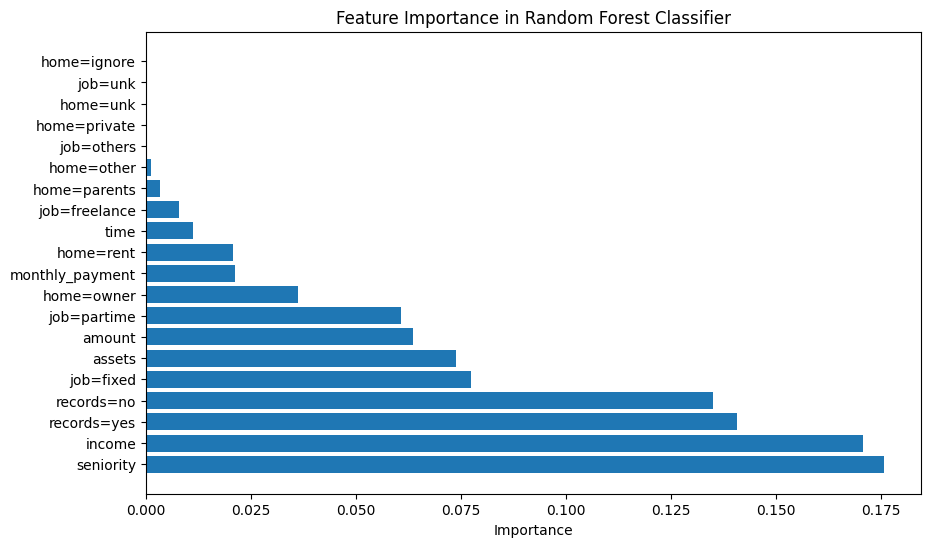

In [75]:
# Get feature importances
feature_importances = rf.feature_importances_

# Get the corresponding feature names
feature_names = dv.get_feature_names_out()

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

`time` and `home` are definetely out. Finally, let's train XGBoost model on top of this.

In [76]:
import xgboost as xgb

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'seed': RANDOM_STATE,
    'verbosity': 1
}


xgb_model = xgb.XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict_proba(X_valid)[:, 1]

roc_auc_score(y_val, y_pred)

0.8499758385270174

All right, this needs proper optimization. GBTs are the most promising models out there!

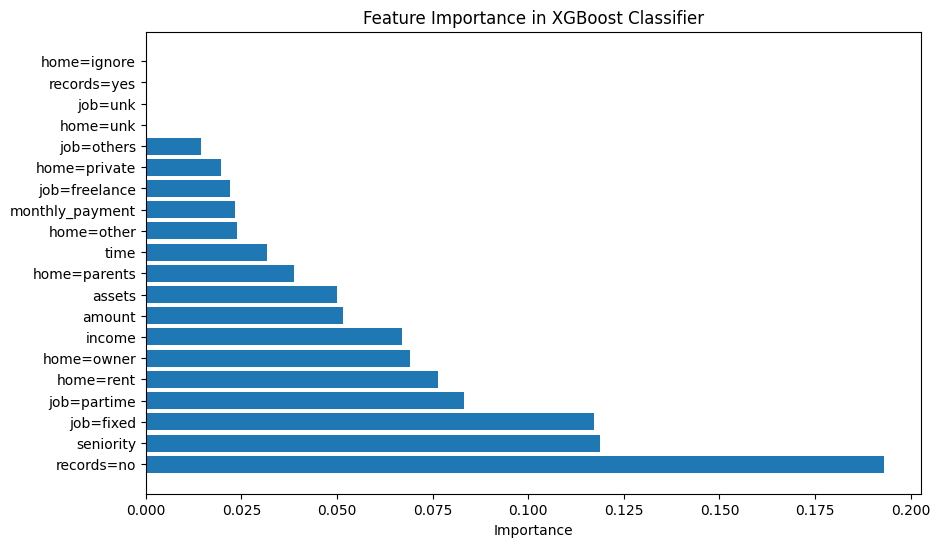

In [77]:
# Get feature importances
feature_importances = xgb_model.feature_importances_

# Get the corresponding feature names
feature_names = dv.get_feature_names_out()

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in XGBoost Classifier')
plt.show()

Wow, thank you XGBoost for being scumbag on the features I want to get out. :) Just kidding, will try without them!

---
Can you trust all these importances? Well, I've once stumbled upon course by much appreciated Jeremy Howard and I think I would revise that 'Introduction to ML' to check again what he thinks about it. For the purpose of this 'simple' playground I think I will be fine. ;) 

I wanted to test if for example `LogisticRegression` and `RandomForest` and/or `XGBoost Classifier` could for an ensemble and how good the predictions would be. Let's do something about it, just for fun.

In [79]:
def auc_ensemble_score(model_1, model_2):

    weights = [(0.3, 0.7), (0.7, 0.3), (0.6, 0.4), (0.4, 0.6), (0.5, 0.5)]
    model_1_name = model_1.__class__.__name__
    model_2_name = model_2.__class__.__name__
    
    print("-----------------------------------------------------------------------")
    print(f"    Ensemble of'{model_1_name}' and '{model_2_name}'.")
    print("-----------------------------------------------------------------------")
    
    for (a,b) in weights:
        model_1_predict_proba = model_1.predict_proba(X_valid)[:, 1]
        model_2_predict_proba = model_2.predict_proba(X_valid)[:, 1]

        #Combining two models with weighted average
        ensemble_pred_proba = a*model_1_predict_proba + b*model_2_predict_proba
        ensemble_auc = roc_auc_score(y_val, ensemble_pred_proba)

        print(f"       For weights {(a,b)} the AUC is '{ensemble_auc}'.")
    print("-----------------------------------------------------------------------")

In [80]:
auc_ensemble_score(logreg, rf)

-----------------------------------------------------------------------
    Ensemble of'LogisticRegression' and 'RandomForestClassifier'.
-----------------------------------------------------------------------
       For weights (0.3, 0.7) the AUC is '0.8398651913712565'.
       For weights (0.7, 0.3) the AUC is '0.8390721994374712'.
       For weights (0.6, 0.4) the AUC is '0.8395864051445351'.
       For weights (0.4, 0.6) the AUC is '0.8401006108515989'.
       For weights (0.5, 0.5) the AUC is '0.8401315870990126'.
-----------------------------------------------------------------------


In [81]:
auc_ensemble_score(xgb_model, rf)

-----------------------------------------------------------------------
    Ensemble of'XGBClassifier' and 'RandomForestClassifier'.
-----------------------------------------------------------------------
       For weights (0.3, 0.7) the AUC is '0.8438797130360439'.
       For weights (0.7, 0.3) the AUC is '0.8489102556159938'.
       For weights (0.6, 0.4) the AUC is '0.8487058123830648'.
       For weights (0.4, 0.6) the AUC is '0.8458621928705068'.
       For weights (0.5, 0.5) the AUC is '0.8475225197318697'.
-----------------------------------------------------------------------


In [82]:
auc_ensemble_score(xgb_model, logreg)

-----------------------------------------------------------------------
    Ensemble of'XGBClassifier' and 'LogisticRegression'.
-----------------------------------------------------------------------
       For weights (0.3, 0.7) the AUC is '0.843861127287596'.
       For weights (0.7, 0.3) the AUC is '0.8498953002837424'.
       For weights (0.6, 0.4) the AUC is '0.8493501183292653'.
       For weights (0.4, 0.6) the AUC is '0.8461533695961937'.
       For weights (0.5, 0.5) the AUC is '0.8480553111873815'.
-----------------------------------------------------------------------


Let's try "stacking" aka training multiple models independently and use another model (meta-model) to combine their predictions. 

If set to 'predict_proba', the meta-classifier receives the class probabilities predicted by the base classifiers. It averages or takes a weighted average of these probabilities and then makes the final prediction based on the highest probability.

In [83]:
from sklearn.ensemble import StackingClassifier

final_estimator = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)

# Create a StackingClassifier with a meta-model
stacking_clf = StackingClassifier(estimators=[('xgb', xgb_model), ('rf', rf)],
                                  final_estimator=final_estimator, stack_method='predict_proba')

# Train the ensemble model
stacking_clf.fit(X_train, y_train)

# Make predictions
ensemble_predictions = stacking_clf.predict(X_valid)

roc_auc_score(y_val, ensemble_predictions)

0.7106446776611695

Time for some `MLOps`.

In [84]:
import pickle 

In [86]:
with open('models/gb_model.bin', 'wb') as f_out:
    pickle.dump((dv,xgb_model), f_out)

In [91]:
xgb_paramss = {
        'eta': 0.1, 
        'max_depth': 3,
        'min_child_weight': 1,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'seed': RANDOM_STATE,
        'verbosity': 1
    }


xgb_params['eta']

0.1

# MLFlow V1

In [94]:
with mlflow.start_run():
    
    mlflow.set_tag("developer", "goran")
    mlflow.log_param("dataset-path", "./../data/CreditScoring.csv")
    
    xgb_params = {
        'eta': 0.3, 
        'max_depth': 3,
        'min_child_weight': 1,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'seed': RANDOM_STATE,
        'verbosity': 1
    }
    
    #Simply gonna take only 'eta' parameter for now
    mlflow.log_param("eta", xgb_params['eta'])
    
   


    xgb_model = xgb.XGBClassifier(**xgb_params)
    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict_proba(X_valid)[:, 1]
    
    roc_auc = roc_auc_score(y_val, y_pred)
    
    mlflow.log_metric("AUC", roc_auc)
    
print(roc_auc)

0.8393045212930724


# MLFlow V2

In [95]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

We've put everything in function such that we don't need to re-execute everytime for MLFlow to log it.

In [ ]:
#TODO
#Ovo ispod treba prepraviti!

def objective(params):
    with mlflow.start_run():
        
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        
        booster = xgb.XGBClassifier(
            params = params,
            train = X_train,
            num_boost_round=1000,
            evals = [(valid, 'validation')],
            early_stopping_rounds = 50 #If model starts degrading after 50 boosts 
        )
        
        y_pred = booster.predict(valid)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}